In [33]:
# !pip install kagglehub

In [ ]:
#TODO: 1. Use MultiLabelBinarizer for Genres column - DONE
    #  2. Preprocess the datetime values - DONE
    #  3. Preprocess duration column using time in minutes - DONE
    #  4. Preprosess the description data using NLPs
    #  5. Write the pipelines for the preprocessing
    #  6. Replace Nans in Duration in minutes with median - DONE
    #  7. Replace Nans in rating with mean - DoNE
    #  8. Use df.explode for Genres column - DONE
    #  9. Plot the most common words in the descriptions
    # 10. Calculate the ratings of genres and plot - DONE
    # 11. Plot the duration of the films according to their genres - DONE 
    # 12. Split the data by the dacades and calculate the ratings of the films
    # 13. Refactor the code
    # 14. Plot how many films of differents genres are in the dataset - DONE
    # 15. How many movies where released in different dacades
    # 16. 
    # 17. 
    # 18. 
    # 19. 
    # 20. 
    # 21. 



In [35]:
import kagglehub

path = kagglehub.dataset_download("kashifsahil/16000-movies-1910-2024-metacritic")

print(path)

C:\Users\aanas\.cache\kagglehub\datasets\kashifsahil\16000-movies-1910-2024-metacritic\versions\1


In [36]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

#### Load the data

In [37]:
data = pd.read_csv("16k_Movies.csv")
data

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"
...,...,...,...,...,...,...,...,...,...,...
16285,16285,Boys to Men,"Apr 27, 2001",Compilation of 4 short films from different di...,NaN,NaN,NaN,NaN,\n https://www.amazon.com/Boys-Men-Phil...,Drama
16286,16286,Saint Misbehavin': The Wavy Gravy Movie,"Dec 10, 2010","Beginning with Woodstock ‘99, director Michell...",NaN,NaN,Michelle Esrick,NaN,Not Rated,Documentary
16287,16287,Collectors,"Oct 1, 2000",America is drawn to the macabre handiwork of t...,NaN,NaN,Julian P. Hobbs,NaN,1 h 20 m,Documentary
16288,16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,"Documentary,Biography,History,War"


#### Drop unnecessary columns and duplicates

In [38]:
# Drop unnecessary column
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"
...,...,...,...,...,...,...,...,...,...
16285,Boys to Men,"Apr 27, 2001",Compilation of 4 short films from different di...,NaN,NaN,NaN,NaN,\n https://www.amazon.com/Boys-Men-Phil...,Drama
16286,Saint Misbehavin': The Wavy Gravy Movie,"Dec 10, 2010","Beginning with Woodstock ‘99, director Michell...",NaN,NaN,Michelle Esrick,NaN,Not Rated,Documentary
16287,Collectors,"Oct 1, 2000",America is drawn to the macabre handiwork of t...,NaN,NaN,Julian P. Hobbs,NaN,1 h 20 m,Documentary
16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,"Documentary,Biography,History,War"


In [39]:
data.drop_duplicates(inplace=True)
data

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"
...,...,...,...,...,...,...,...,...,...
16285,Boys to Men,"Apr 27, 2001",Compilation of 4 short films from different di...,NaN,NaN,NaN,NaN,\n https://www.amazon.com/Boys-Men-Phil...,Drama
16286,Saint Misbehavin': The Wavy Gravy Movie,"Dec 10, 2010","Beginning with Woodstock ‘99, director Michell...",NaN,NaN,Michelle Esrick,NaN,Not Rated,Documentary
16287,Collectors,"Oct 1, 2000",America is drawn to the macabre handiwork of t...,NaN,NaN,Julian P. Hobbs,NaN,1 h 20 m,Documentary
16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,"Documentary,Biography,History,War"


#### Preprocess the unusable data

###### Genres

In [40]:
data["Genres"] = data["Genres"].fillna("Unknown")
unique_genres = []
unique_genres_in_data = data["Genres"].unique()
for genres in unique_genres_in_data:
    if genres:
        for genre in genres.split(","):
            if genre not in unique_genres:
                unique_genres.append(genre)

unique_genres

['Drama',
 'Mystery',
 'Romance',
 'History',
 'Crime',
 'Adventure',
 'Biography',
 'War',
 'Comedy',
 'Thriller',
 'Fantasy',
 'Documentary',
 'Sport',
 'Sci-Fi',
 'Action',
 'Animation',
 'Family',
 'Music',
 'Horror',
 'News',
 'Musical',
 'Unknown',
 'Western',
 'Game-Show',
 'Film-Noir',
 'Talk-Show',
 'Reality-TV']

In [41]:
data['Genres'] = data['Genres'].str.split(",")
data = data.explode("Genres")
data

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Drama
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Mystery
1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Romance
2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
...,...,...,...,...,...,...,...,...,...
16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,Documentary
16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,Biography
16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,History
16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,War


In [42]:
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')
data

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Drama
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Mystery
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Romance
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
...,...,...,...,...,...,...,...,...,...
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,Documentary
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,Biography
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,History
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,War


###### Duration

In [43]:
# Prepro
def duration_to_minutes(text):
    match = re.match(r'^\s*(\d+)\s*h\s+(\d+)\s*m\s*$', str(text))
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return hours * 60 + minutes
    return None

data["Duration in m"] = data['Duration'].apply(duration_to_minutes)

data

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres,Duration in m
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama,572.0
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Drama,99.0
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Mystery,99.0
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,Romance,99.0
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama,107.0
...,...,...,...,...,...,...,...,...,...,...
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,Documentary,93.0
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,Biography,93.0
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,History,93.0
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,War,93.0


In [44]:
data.drop(columns=["Duration"], axis=1, inplace=True)
data

,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Genres,Duration in m
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama,572.0
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Drama,99.0
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Mystery,99.0
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Romance,99.0
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama,107.0
...,...,...,...,...,...,...,...,...,...
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,Documentary,93.0
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,Biography,93.0
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,History,93.0
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,War,93.0


#### Work with Nan values

In [45]:
# Detect the amount of nan values in every column
print("Amount of NaN values in every column")
for column in data.columns:
    print(f"{column:20}: {data[column].isna().sum()}")

## As we can see 

Amount of NaN values in every column
Title               : 0
Release Date        : 0
Description         : 0
Rating              : 6686
No of Persons Voted : 6731
Directed by         : 9
Written by          : 1721
Genres              : 0
Duration in m       : 1211


In [46]:
data["Duration in m"].fillna(data["Duration in m"].mean(), inplace=True)
data

C:\Users\aanas\AppData\Local\Temp\ipykernel_13200\2153672091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Duration in m"].fillna(data["Duration in m"].mean(), inplace=True)


,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Genres,Duration in m
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama,572.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Drama,99.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Mystery,99.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Romance,99.000000
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama,107.000000
...,...,...,...,...,...,...,...,...,...
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,Documentary,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,Biography,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,History,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,NaN,NaN,Martin Doblmeier,Martin Doblmeier,War,93.000000


In [47]:
data["Rating"].fillna(data["Rating"].mode()[0], inplace=True)
data

C:\Users\aanas\AppData\Local\Temp\ipykernel_13200\2893985796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Rating"].fillna(data["Rating"].mode()[0], inplace=True)


,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Genres,Duration in m
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama,572.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Drama,99.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Mystery,99.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Romance,99.000000
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama,107.000000
...,...,...,...,...,...,...,...,...,...
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,NaN,Martin Doblmeier,Martin Doblmeier,Documentary,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,NaN,Martin Doblmeier,Martin Doblmeier,Biography,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,NaN,Martin Doblmeier,Martin Doblmeier,History,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,NaN,Martin Doblmeier,Martin Doblmeier,War,93.000000


In [48]:
data["No of Persons Voted"] = pd.to_numeric(data["No of Persons Voted"], errors="coerce")
data["No of Persons Voted"].fillna(data["No of Persons Voted"].median(), inplace=True)
data

C:\Users\aanas\AppData\Local\Temp\ipykernel_13200\3741565065.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["No of Persons Voted"].fillna(data["No of Persons Voted"].median(), inplace=True)


,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Genres,Duration in m
0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",Drama,572.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Drama,99.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Mystery,99.000000
1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",Romance,99.000000
2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106.0,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",Drama,107.000000
...,...,...,...,...,...,...,...,...,...
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,38.0,Martin Doblmeier,Martin Doblmeier,Documentary,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,38.0,Martin Doblmeier,Martin Doblmeier,Biography,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,38.0,Martin Doblmeier,Martin Doblmeier,History,93.000000
16288,Bonhoeffer,2003-06-20,Dramatic documentary about the young German pa...,7.0,38.0,Martin Doblmeier,Martin Doblmeier,War,93.000000


#### Plotting

In [49]:
genres_rating = data.groupby("Genres")["Rating"].mean().sort_values(ascending=False)
genres_rating

Genres
Game-Show      7.000000
Reality-TV     7.000000
Talk-Show      7.000000
Animation      6.906827
News           6.903390
Biography      6.869428
War            6.864342
History        6.849611
Music          6.848272
Documentary    6.814292
Unknown        6.810000
Drama          6.792430
Crime          6.759816
Musical        6.750000
Western        6.737566
Romance        6.697872
Sport          6.676331
Comedy         6.628953
Fantasy        6.625139
Adventure      6.620502
Family         6.613194
Thriller       6.577621
Action         6.571122
Mystery        6.523256
Sci-Fi         6.502032
Horror         6.275068
Film-Noir      6.000000
Name: Rating, dtype: float64

Text(0, 0.5, 'Rating')

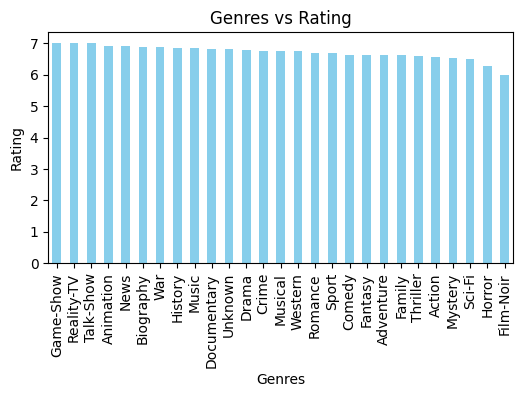

In [50]:
plt.figure(figsize=(6, 3))
genres_rating.plot(kind="bar", color="skyblue")

plt.title("Genres vs Rating")
plt.xlabel("Genres")
plt.ylabel("Rating")


In [51]:
genres_duration = data.groupby("Genres")["Duration in m"].mean().sort_values(ascending=False)
genres_duration


Genres
Western        115.194686
War            114.392992
History        113.922340
Biography      109.851208
Action         109.675813
Adventure      108.094985
Drama          107.456796
Crime          106.909557
Sci-Fi         106.889097
Mystery        105.904682
Romance        105.887437
Thriller       105.847444
Musical        105.745709
Sport          105.602251
Fantasy        104.363456
Music          103.701300
Unknown        101.935246
Comedy          99.976077
Horror          98.436753
Game-Show       98.000000
Family          97.592361
Documentary     96.490506
Film-Noir       96.000000
Animation       93.756207
News            91.427586
Talk-Show       83.000000
Reality-TV      82.000000
Name: Duration in m, dtype: float64

Text(0, 0.5, 'Duration in minutes')

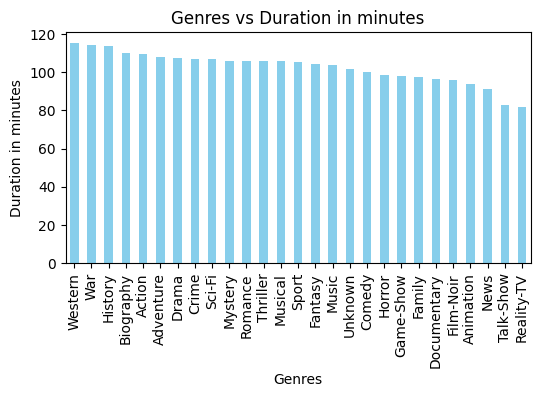

In [52]:
plt.figure(figsize=(6, 3))
genres_duration.plot(kind="bar", color="skyblue")

plt.title("Genres vs Duration in minutes")
plt.xlabel("Genres")
plt.ylabel("Duration in minutes")

In [53]:
# plot the sum of films different genres
sum_of_genres = data["Genres"].value_counts()
sum_of_genres

Genres
Drama          8838
Comedy         4863
Thriller       3624
Romance        3008
Crime          2394
Action         2282
Documentary    2197
Adventure      1712
Mystery        1634
Horror         1460
Biography      1364
Fantasy        1257
Sci-Fi         1181
Family          955
History         899
Music           868
War             631
Sport           507
Animation       498
Musical         286
Western         189
News             59
Unknown          20
Game-Show         1
Film-Noir         1
Talk-Show         1
Reality-TV        1
Name: count, dtype: int64

Text(0, 0.5, 'Numberr of films')

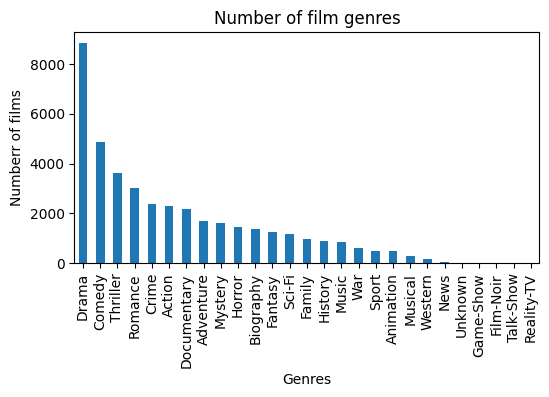

In [54]:
plt.figure(figsize=(6, 3))
sum_of_genres.plot(kind="bar")

plt.title("Number of film genres")
plt.xlabel("Genres")
plt.ylabel("Numberr of films")